In [45]:
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2


In [85]:
name = '255'
img = '/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/image_02/data/0000000' + name + '.png'
label_txt = '/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/labels/0000000' + name + '.txt'
binary = '/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/velodyne_points/data/0000000' + name + '.bin'
point_out = '/Users/jinxuanchen/Files_Local/Point_image_fusion/kittidata/2011_09_26_drive_0096_sync/outpoints/' + name + '.txt'

In [47]:
P2 = np.matrix([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
               [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
               [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]])
P2

matrix([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
        [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]])

In [48]:
R0_rect = np.matrix([[9.998817e-01,1.511453e-02,-2.841595e-03],
                     [-1.511724e-02,9.998853e-01,-9.338510e-04],
                     [2.827154e-03,9.766976e-04,9.999955e-01]])
R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
R0_rect

matrix([[ 9.998817e-01,  1.511453e-02, -2.841595e-03,  0.000000e+00],
        [-1.511724e-02,  9.998853e-01, -9.338510e-04,  0.000000e+00],
        [ 2.827154e-03,  9.766976e-04,  9.999955e-01,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [49]:
R0_rect = np.matrix([[9.999239e-01,9.837760e-03,-7.445048e-03],
                     [-9.869795e-03,9.999421e-01,-4.278459e-03],
                     [7.402527e-03,4.351614e-03,9.999631e-01]])
R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
R0_rect

matrix([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
        [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
        [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [50]:
R = np.matrix([[7.533745e-03,-9.999714e-01,-6.166020e-04],
               [1.480249e-02,7.280733e-04,-9.998902e-01],
               [9.998621e-01,7.523790e-03,1.480755e-02]])
R

matrix([[ 7.533745e-03, -9.999714e-01, -6.166020e-04],
        [ 1.480249e-02,  7.280733e-04, -9.998902e-01],
        [ 9.998621e-01,  7.523790e-03,  1.480755e-02]])

In [51]:
T = np.matrix([[-4.069766e-03],
               [ -7.631618e-02],
                [ -2.717806e-01]])
T

matrix([[-0.00406977],
        [-0.07631618],
        [-0.2717806 ]])

In [52]:
Tr_velo_to_cam = np.matrix([[7.533745e-03,-9.999714e-01,-6.166020e-04,-4.069766e-03],
                            [1.480249e-02,7.280733e-04,-9.998902e-01,-7.631618e-02],
                            [9.998621e-01,7.523790e-03,1.480755e-02,-2.717806e-01]])
Tr_velo_to_cam = np.insert(Tr_velo_to_cam,3,values=[0,0,0,1],axis=0)
Tr_velo_to_cam

matrix([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
        [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
        [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [53]:
# read raw data from binary
scan = np.fromfile(binary, dtype=np.float32).reshape((-1,4))
points = scan[:, 0:3] # lidar xyz (front, left, up)
points

array([[78.499, 11.851,  2.894],
       [78.513, 12.105,  2.895],
       [69.416, 11.707,  2.59 ],
       ...,
       [ 3.726, -1.409, -1.742],
       [ 3.763, -1.41 , -1.758],
       [ 3.655, -1.356, -1.702]], dtype=float32)

In [54]:
velo = np.insert(points,3,1,axis=1).T
velo

array([[78.499, 78.513, 69.416, ...,  3.726,  3.763,  3.655],
       [11.851, 12.105, 11.707, ..., -1.409, -1.41 , -1.356],
       [ 2.894,  2.895,  2.59 , ..., -1.742, -1.758, -1.702],
       [ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ]],
      dtype=float32)

In [55]:
_,s = velo.shape
index  = np.arange(0,s).reshape(1,s)
index.shape

(1, 121400)

In [56]:

velo1 = np.delete(velo,np.where(velo[0,:]<0),axis=1)
index1 = np.delete(index,np.where(velo[0,:]<0),axis=1)

In [57]:
index1

array([[     0,      1,      2, ..., 121397, 121398, 121399]])

In [58]:
test = velo.T
np.savetxt('/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/test_full.txt',test,fmt="%.8f")

In [59]:
cam = P2 * R0_rect * Tr_velo_to_cam * velo1
cam1 = np.delete(cam,np.where(cam[2,:]<0)[1],axis=1)
cam1

matrix([[3.91842501e+04, 3.90095437e+04, 3.37506517e+04, ...,
         3.16734608e+03, 3.19064617e+03, 3.08577219e+03],
        [1.20668899e+04, 1.20706375e+04, 1.06461335e+04, ...,
         1.81395620e+03, 1.83213720e+03, 1.77276804e+03],
        [7.82570466e+01, 7.82710878e+01, 6.91713474e+01, ...,
         3.43802828e+00, 3.47485885e+00, 3.36745670e+00]])

In [60]:
index_cam1 = np.delete(index1,np.where(cam[2,:]<0)[1],axis=1)
index_cam1.shape

(1, 61772)

In [61]:
index_cam1

array([[     0,      1,      2, ..., 121397, 121398, 121399]])

In [62]:
# get u,v,z
cam1[:2] /= cam1[2,:]  # cam[:2] = cam[:2] /cam[2:]  uv = xy / z 
cam1

matrix([[500.7120991 , 498.39020682, 487.92820996, ..., 921.26818899,
         918.20885514, 916.35096295],
        [154.19557048, 154.21578806, 153.90958704, ..., 527.61526376,
         527.25514383, 526.44122917],
        [ 78.25704662,  78.27108783,  69.17134737, ...,   3.43802828,
           3.47485885,   3.3674567 ]])

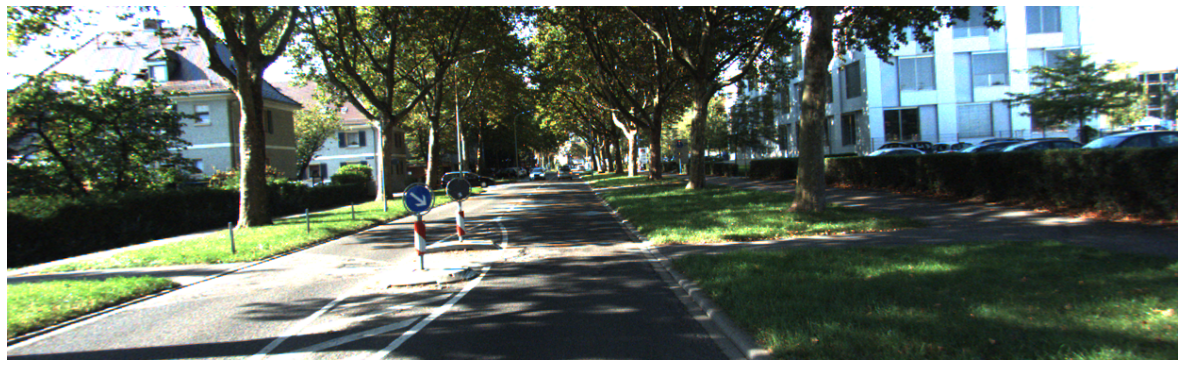

In [63]:
# do projection staff

plt.figure(figsize=(1242/72,375/72),dpi = 72, tight_layout=True)
png = mpimg.imread(img)
# png = cv2.imread(img)
# png = png[:,:,::-1]

IMG_H,IMG_W,_ = png.shape
# # restrict canvas in range
plt.axis('off')


plt.imshow(png)

In [64]:
# filter point out of canvas
u,v,z = cam1
u_out = np.logical_or(u<0, u>IMG_W)
v_out = np.logical_or(v<0, v>IMG_H)
outlier = np.logical_or(u_out, v_out)
cam2 = np.delete(cam1,np.where(outlier),axis=1)
cam2.shape

(3, 19552)

In [65]:
index_cam2 = np.delete(index_cam1,np.where(outlier),axis=1)
index_cam2

array([[    1,     2,     3, ..., 91322, 91323, 91324]])

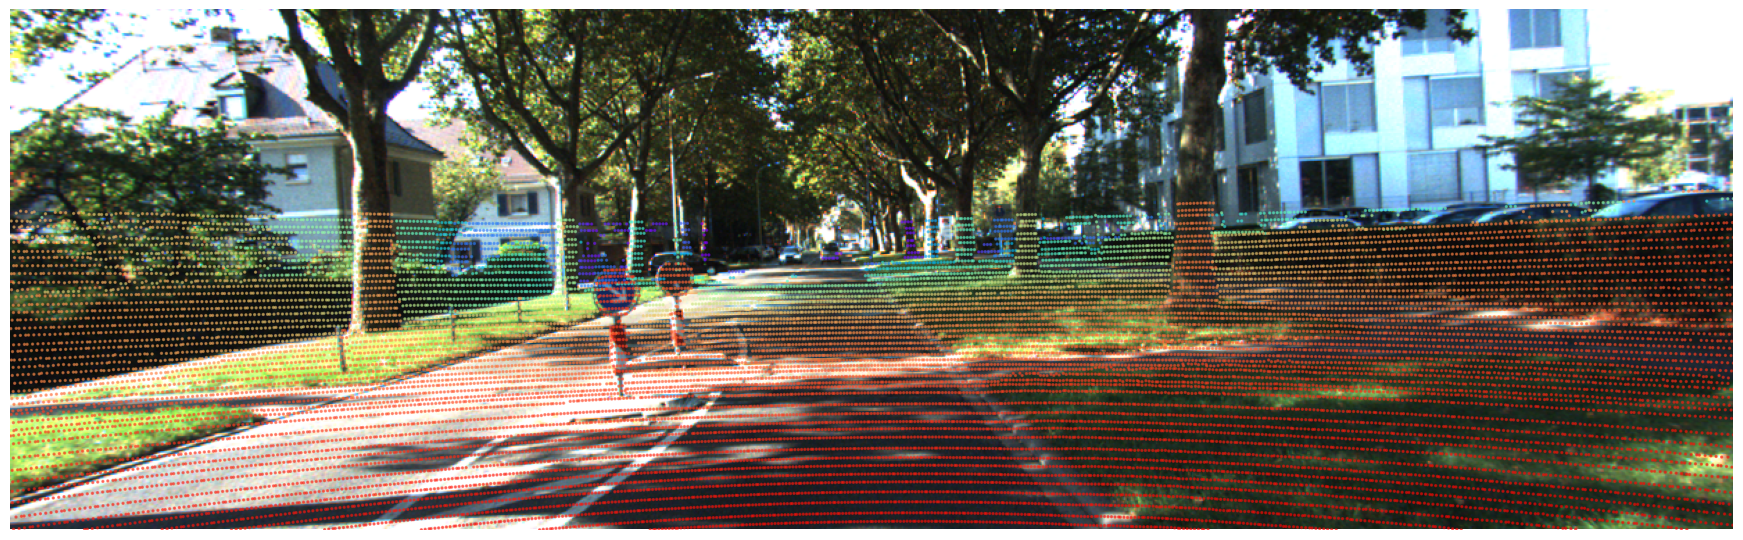

In [66]:
# generate color map from depth 
u,v,z = cam2

# plt.figure(figsize=(1242/72,375/72),dpi = 72, tight_layout=True)
plt.scatter([u],[v],c=[z],cmap='rainbow_r',alpha=0.5,s=2)
plt.axis('off')
# # plt.axis([0,IMG_W,IMG_H,0])

plt.imshow(png)

fig = plt.gcf()
fig.set_size_inches(1242/72,375/72)

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)

plt.savefig('/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '_withpc.png', format='png', transparent=True, dpi=72, pad_inches = 0)

In [75]:
label = pd.read_csv(label_txt,header=None,sep=' ')
label

0         1         2         3     4
0  38  0.351047  0.546667  0.025765  0.08

420


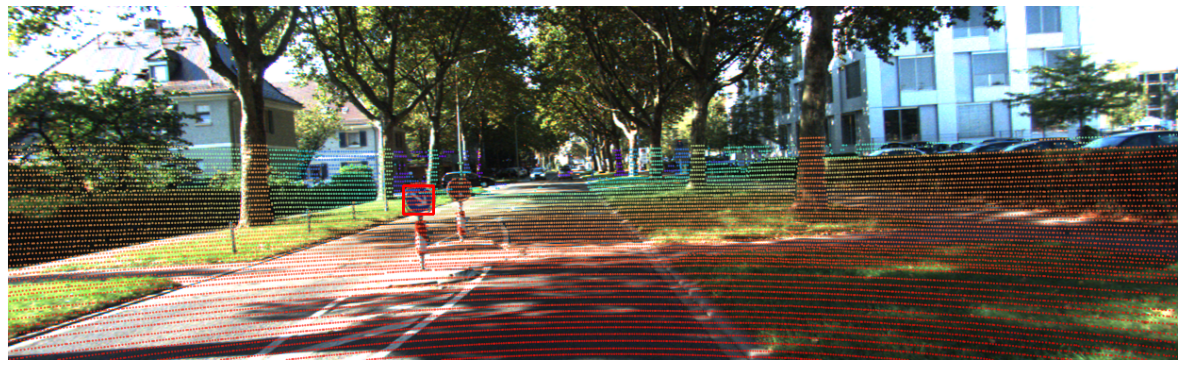

In [76]:
img_c = cv2.imread(
    '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '_withpc.png')

for i in range(len(label[0])):
    box_lx = int(label[1][i]*1242-label[3][i]*1242/2)
    box_ly = int(label[2][i]*375-label[4][i]*375/2)
    box_rx = int(label[1][i]*1242+label[3][i]*1242/2)
    box_ry = int(label[2][i]*375+label[4][i]*375/2)
    print(box_lx)
    cv2.rectangle(img_c, (box_lx, box_ly), (box_rx, box_ry), (0, 0, 255), 2)


jpg2 = img_c[:, :, ::-1]
plt.figure(figsize=(1242/72, 375/72), dpi=72, tight_layout=True)
plt.axis('off')
# plt.axis('off')
plt.imshow(jpg2)


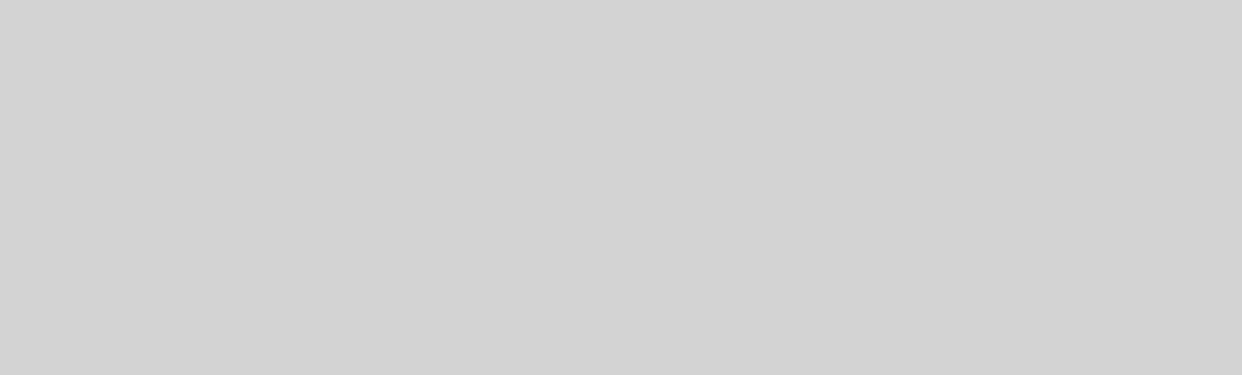

In [77]:
from PIL import Image
jpg = cv2.imread(img)
b_y, b_x, _ = jpg.shape
bg = Image.new("RGB",(b_x, b_y),(211,211,211))

bg

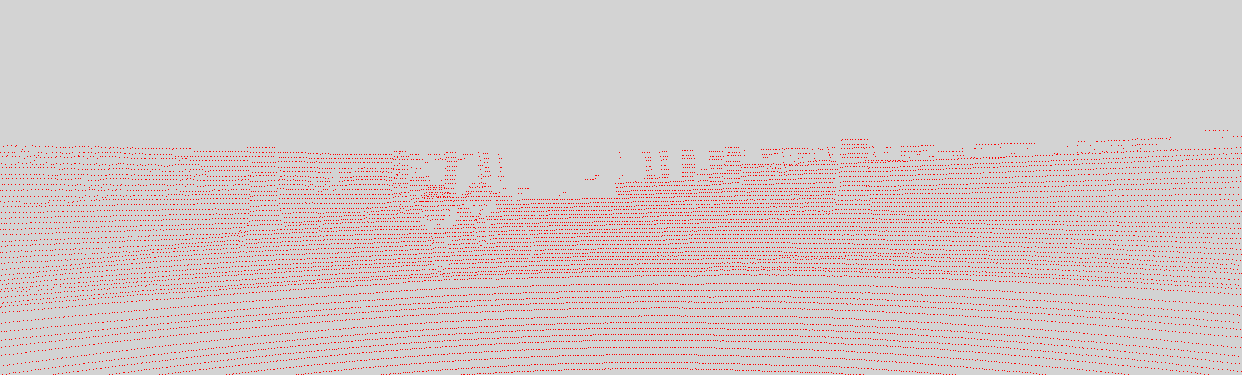

In [78]:
from PIL import ImageDraw
points = Image.new("RGB",(b_x, b_y),(211,211,211))
point = ImageDraw.ImageDraw(points)
_, i = u.shape

for i in range(0, i):
    x_2d = int(u[0, i])
    y_2d = int(v[0, i])
    point.point( (x_2d, y_2d), (255, 0, 0))

points


420


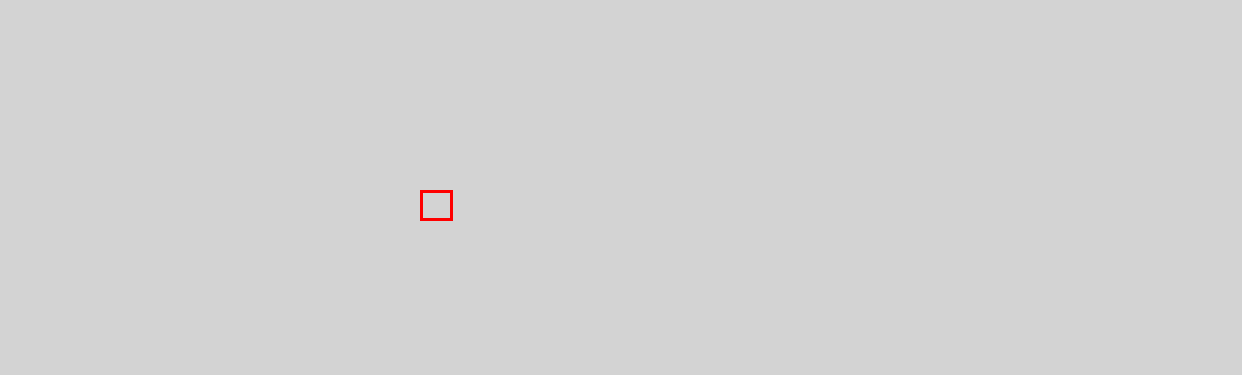

In [79]:
boxs = Image.new("RGB",(b_x, b_y),(211,211,211))
box = ImageDraw.ImageDraw(boxs)
for i in range(len(label[0])):
    box_lx = int(label[1][i]*1242-label[3][i]*1242/2)
    box_ly = int(label[2][i]*375-label[4][i]*375/2)
    box_rx = int(label[1][i]*1242+label[3][i]*1242/2)
    box_ry = int(label[2][i]*375+label[4][i]*375/2)
    print(box_lx)
    box.rectangle(((box_lx, box_ly), (box_rx, box_ry)),fill=None,outline=(255,0,0),width=3)

boxs

In [80]:
index_cam2[0,1]

2

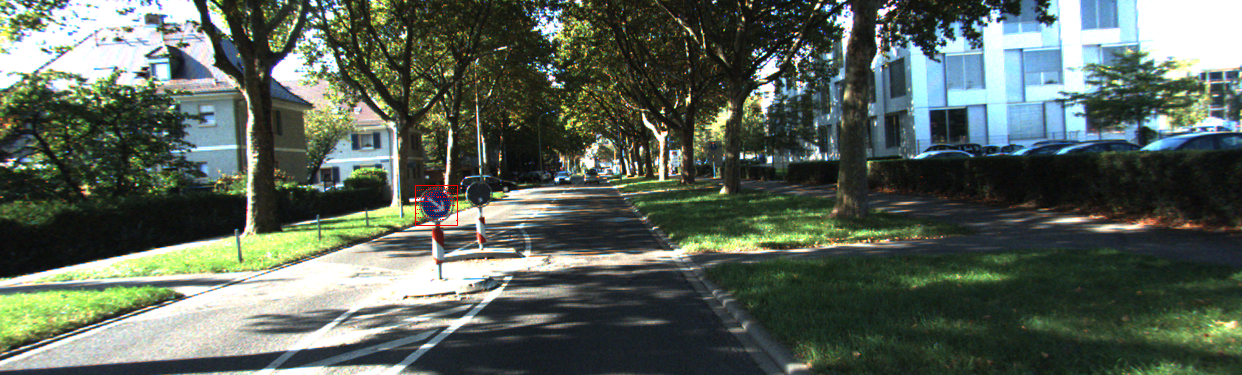

In [81]:
points_inbox = Image.open(img)
pinb = ImageDraw.ImageDraw(points_inbox)

enlarge = 5

_, j = u.shape
u_2d = []
v_2d = []
z_2d = []
index_inbox = []

for i in range(len(label[0])):
    box_lx = int(label[1][i]*1242-label[3][i]*1242/2 - enlarge)
    box_ly = int(label[2][i]*375-label[4][i]*375/2-enlarge)
    box_rx = int(label[1][i]*1242+label[3][i]*1242/2+enlarge)
    box_ry = int(label[2][i]*375+label[4][i]*375/2+enlarge)
    pinb.rectangle(((box_lx, box_ly), (box_rx, box_ry)),
                   fill=None, outline=(255, 0, 0), width=1)

    for j in range(0, j):
        if box_lx < int(u[0, j]) < box_rx and box_ly < int(v[0, j]) < box_ry:
            xinb_2d = (u[0, j])
            yinb_2d = (v[0, j])
            zinb_2d = (z[0, j])
            u_2d.append(xinb_2d)
            v_2d.append(yinb_2d)
            z_2d.append(zinb_2d)
            index_inbox.append(index_cam2[0, j])
            pinb.point((int(xinb_2d), int(yinb_2d)), (255, 0, 0))

points_inbox


In [82]:
index_inbox

[12187,
 12188,
 12189,
 12190,
 12191,
 12192,
 12193,
 12194,
 12195,
 12196,
 12197,
 12198,
 12199,
 12200,
 12201,
 12202,
 14063,
 14064,
 14065,
 14066,
 14067,
 14068,
 14069,
 14070,
 14071,
 14072,
 14073,
 14074,
 14075,
 14076,
 15988,
 15989,
 15990,
 15991,
 15992,
 15993,
 15994,
 15995,
 15996,
 15997,
 15998,
 15999,
 16000,
 16001,
 16002,
 16003,
 17957,
 17958,
 17959,
 17960,
 17961,
 17962,
 17963,
 17964,
 17965,
 17966,
 17967,
 17968,
 17969,
 17970,
 17971,
 17972,
 17973,
 17974,
 19963,
 19964,
 19965,
 19966,
 19967,
 19968,
 19969,
 19970,
 19971,
 19972,
 19973,
 19974,
 19975,
 19976,
 19977,
 19978,
 19979,
 21968,
 21969,
 21970,
 21971,
 21972,
 21973,
 21974,
 21975,
 21976,
 21977,
 21978,
 21979,
 21980,
 21981,
 21982,
 21983,
 23981,
 23982,
 23983,
 23984,
 23985,
 23986,
 23987,
 23988,
 23989,
 23990,
 23991,
 23992,
 23993,
 23994,
 23995,
 23996,
 23997,
 26037,
 26038,
 26039,
 26040,
 26041,
 26042,
 26043,
 26044,
 26045,
 26046,
 26047,


In [83]:
scan.shape

(121400, 4)

In [84]:
intensity = scan[:, 3:4].T
intensity

array([[0.  , 0.  , 0.07, ..., 0.37, 0.44, 0.  ]], dtype=float32)

In [86]:
x = []
y = []
z = []
inten = []

for i in index_inbox:
    x_t = velo[0,int(i)]
    y_t = velo[1,int(i)]
    z_t = velo[2,int(i)]
    i_t = intensity[0,int(i)]
    x.append(x_t)
    y.append(y_t)
    z.append(z_t)
    inten.append(i_t)
    
x = np.array(x)
y = np.array(y)
z = np.array(z)
inten = np.array(inten)


np.savetxt(point_out,np.vstack([x,y,z,inten]).T,fmt="%.8f")

In [778]:
import open3d as o3d
target_points = np.vstack([x,y,z,inten])


: 

In [ ]:
np.delete(target_points,np.where(target_points[0,:]<0),axis=1)